# pandas 라이브러리 시작하기

<b>pandas를 사용하기에 앞서 numpy와 pandas 라이브러리를 import하자.</b>

In [1]:
import numpy as np
import pandas as pd

## pandas 자료구조
* Series : numpy의 1차원 array와 유사
* DataFrame : numpy의 2차원 array와 유사

### Series 정의 

In [2]:
obj = pd.Series([96, 88, 100, 68])
obj

0     96
1     88
2    100
3     68
dtype: int64

Series 객체는 색인(Index)와 값(Values)을 갖는다.

In [3]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [4]:
obj.values

array([ 96,  88, 100,  68])

문자열을 이용한 색인


In [5]:
score = pd.Series([96, 88, 100, 68], index=['김은서', '박민철', '정윤주', '홍길동'])
score

김은서     96
박민철     88
정윤주    100
홍길동     68
dtype: int64

색인을 이용한 데이터 검색

In [6]:
score['정윤주']

100

색인을 이용한 데이터 수정

In [7]:
score['박민철'] = 85
score.values

array([ 96,  85, 100,  68])

특정 조건을 만족하는 값을 가진 데이터 검색

In [8]:
# 점수가 80점 이상인 데이터들을 검색하여 출력
score[score > 80]

김은서     96
박민철     85
정윤주    100
dtype: int64

## Series 요소의 연산

In [9]:
obj1 = pd.Series([1, 3, 5, 7, 9])
obj2 = obj1 * 2
obj2

0     2
1     6
2    10
3    14
4    18
dtype: int64

In [10]:
obj_sqr = np.sqrt(obj1)
obj_sqr

0    1.000000
1    1.732051
2    2.236068
3    2.645751
4    3.000000
dtype: float64

## python 사전(dictionary)과 pandas의 Series

Series : 파이썬의 사전과 유사, 고정 길이의 사전<br>
Series 객체는 파이썬의 사전형을 인자로 받아야 하는 함수에서 사전형을 대체하여 사용할 수 있다.

In [3]:
covid19 = {'세울': 5702, '대구': 7142, '경기':4869, '경북':1573, '인천':999, '광주':502, '충남':505, '부산':571}
covid_19 = pd.Series(covid19)
covid_19

세울    5702
대구    7142
경기    4869
경북    1573
인천     999
광주     502
충남     505
부산     571
dtype: int64

색인(Index) 변경

In [4]:
covid_19.index = ['서울', '대구', '경기', '경북', '인천', '광주', '충남', '부산']
covid_19

서울    5702
대구    7142
경기    4869
경북    1573
인천     999
광주     502
충남     505
부산     571
dtype: int64

In [5]:
covid_19.name = '확진자수'
covid_19.index.name='지역'
covid_19

지역
서울    5702
대구    7142
경기    4869
경북    1573
인천     999
광주     502
충남     505
부산     571
Name: 확진자수, dtype: int64

한글 폰트 설치

In [14]:
# Google Colab 가상 서버에 폰트 설치 (Linux 환경)
!apt -qq -y install fonts-nanum
!apt-get install fonts-nanum* -qq

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144611 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
Selecting previously unselected package fonts-nanum-eco.
(Reading database ... 144629 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-c

COVID-19(우한폐렴) 확진자 수 차트 작성하기

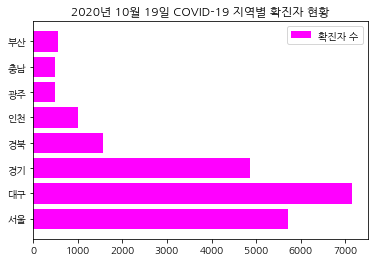

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 10
fm._rebuild()

covid19 = {'서울': 5702, '대구': 7142, '경기':4869, '경북':1573, '인천':999, '광주':502, '충남':505, '부산':571}
covid_19 = pd.Series(covid19)
plt.barh(covid_19.index, covid_19, label='확진자 수', color='magenta')
plt.legend()
plt.title('2020년 10월 19일 COVID-19 지역별 확진자 현황')
plt.show()

### DataFrame 

DataFrame : 엑셀의 표와 같은 형식의 자료구조

In [37]:
data = {'지역': ['서울', '대구', '경기', '경북', '인천', '광주', '충남', '부산'], '확진' : [5702, 7142, 4869, 1573, 999, 502, 505, 571]}
covid_19f = pd.DataFrame(data)
covid_19f

,지역,확진
0,서울,5702
1,대구,7142
2,경기,4869
3,경북,1573
4,인천,999
5,광주,502
6,충남,505
7,부산,571


head() 함수 : 처음 5개의 행만 출력 

In [38]:
covid_19f.head()

,지역,확진
0,서울,5702
1,대구,7142
2,경기,4869
3,경북,1573
4,인천,999


사전에 없는 값을 넘기면 결측치로 저장

In [39]:
covid_19f = pd.DataFrame(data, columns=['지역', '확진', '격리해제', '사망', '격리해제율'])
covid_19f

,지역,확진,격리해제,사망,격리해제율
0,서울,5702,NaN,NaN,NaN
1,대구,7142,NaN,NaN,NaN
2,경기,4869,NaN,NaN,NaN
3,경북,1573,NaN,NaN,NaN
4,인천,999,NaN,NaN,NaN
5,광주,502,NaN,NaN,NaN
6,충남,505,NaN,NaN,NaN
7,부산,571,NaN,NaN,NaN


결측치를 가진 칼럼에 값을 대입

In [42]:
covid_19f['격리해제']=[5161, 6938, 4385, 1506, 920, 493, 473, 449]
covid_19f['사망']= [69, 196, 86, 56, 8, 3, 7, 6]
covid_19f

,지역,확진,격리해제,사망,격리해제율
0,서울,5702,5161,69,0.905121
1,대구,7142,6938,196,0.971437
2,경기,4869,4385,86,0.900596
3,경북,1573,1506,56,0.957406
4,인천,999,920,8,0.920921
5,광주,502,493,3,0.982072
6,충남,505,473,7,0.936634
7,부산,571,449,6,0.786340


격리해제율 계산

In [43]:
covid_19f['격리해제율'] = covid_19f['격리해제']/covid_19f['확진']
covid_19f

,지역,확진,격리해제,사망,격리해제율
0,서울,5702,5161,69,0.905121
1,대구,7142,6938,196,0.971437
2,경기,4869,4385,86,0.900596
3,경북,1573,1506,56,0.957406
4,인천,999,920,8,0.920921
5,광주,502,493,3,0.982072
6,충남,505,473,7,0.936634
7,부산,571,449,6,0.786340


'지역' 칼럼을 인덱스로 사용

In [44]:
matroList = list(covid_19f['지역'])
matroList

['서울', '대구', '경기', '경북', '인천', '광주', '충남', '부산']

'지역' 칼럼 삭제 후 인덱스를 지역명으로 설정

In [45]:
# '지역' 칼럼 삭제
del covid_19f['지역']
covid_19f.index = matroList
covid_19f

,확진,격리해제,사망,격리해제율
서울,5702,5161,69,0.905121
대구,7142,6938,196,0.971437
경기,4869,4385,86,0.900596
경북,1573,1506,56,0.957406
인천,999,920,8,0.920921
광주,502,493,3,0.982072
충남,505,473,7,0.936634
부산,571,449,6,0.786340


DataFrame의 전치 (행과 열을 뒤집음)

In [46]:
covid_19f.T

,서울,대구,경기,경북,인천,광주,충남,부산
확진,5702.000000,7142.000000,4869.000000,1573.000000,999.000000,502.000000,505.000000,571.00000
격리해제,5161.000000,6938.000000,4385.000000,1506.000000,920.000000,493.000000,473.000000,449.00000
사망,69.000000,196.000000,86.000000,56.000000,8.000000,3.000000,7.000000,6.00000
격리해제율,0.905121,0.971437,0.900596,0.957406,0.920921,0.982072,0.936634,0.78634


In [47]:
covid_19f = covid_19f.astype({'확진' : 'Int32', '격리해제' : 'Int32', '사망' : 'Int32'})
covid_19f.T

,서울,대구,경기,경북,인천,광주,충남,부산
확진,5702,7142,4869,1573,999,502,505,571
격리해제,5161,6938,4385,1506,920,493,473,449
사망,69,196,86,56,8,3,7,6
격리해제율,0.905121,0.971437,0.900596,0.957406,0.920921,0.982072,0.936634,0.78634


### DataFrame 편집

재색인

In [48]:
obj_s = pd.Series(np.arange(5.0), index=['d', 'b', 'a', 'c', 'e'])
obj_s

d    0.0
b    1.0
a    2.0
c    3.0
e    4.0
dtype: float64

In [49]:
obj_s = obj_s.reindex(['a', 'b', 'c', 'd', 'e'])
obj_s

a    2.0
b    1.0
c    3.0
d    0.0
e    4.0
dtype: float64

drop() 메서드를 이용한 행 또는 열 삭제

In [50]:
# 한 개의 행 삭제
obj_new = obj_s.drop('c')
obj_new

a    2.0
b    1.0
d    0.0
e    4.0
dtype: float64

In [51]:
# 두 개 이상의 행 삭제
obj_new = obj_new.drop(['b', 'd'])
obj_new

a    2.0
e    4.0
dtype: float64

In [52]:
# DataFrame의 행 삭제 - 충남, 광주
new_covid19 = covid_19f
new_covid19 = new_covid19.drop(['충남', '광주'])
new_covid19

,확진,격리해제,사망,격리해제율
서울,5702,5161,69,0.905121
대구,7142,6938,196,0.971437
경기,4869,4385,86,0.900596
경북,1573,1506,56,0.957406
인천,999,920,8,0.920921
부산,571,449,6,0.786340


In [53]:
# DataFrame 열 삭제 - '사망' 
new_covid19= new_covid19.drop('사망', axis=1)
new_covid19

,확진,격리해제,격리해제율
서울,5702,5161,0.905121
대구,7142,6938,0.971437
경기,4869,4385,0.900596
경북,1573,1506,0.957406
인천,999,920,0.920921
부산,571,449,0.786340


### DataFrame 슬라이싱

In [54]:
covid_19f = covid_19f.reindex(['대구', '서울', '경기', '경북', '인천', '광주', '충남', '부산'])
covid_19f

,확진,격리해제,사망,격리해제율
대구,7142,6938,196,0.971437
서울,5702,5161,69,0.905121
경기,4869,4385,86,0.900596
경북,1573,1506,56,0.957406
인천,999,920,8,0.920921
광주,502,493,3,0.982072
충남,505,473,7,0.936634
부산,571,449,6,0.786340


In [55]:
covid19_top3 = covid_19f[:3]
covid19_top3

,확진,격리해제,사망,격리해제율
대구,7142,6938,196,0.971437
서울,5702,5161,69,0.905121
경기,4869,4385,86,0.900596
